# Introduction to MatPlotLib library for charts

MatPlotLib is probably the most used charting library in Python. There is a good [tutorial available on MatPlotLib documentation ](https://matplotlib.org/tutorials/introductory/pyplot.html) page, it is strongly advised to read it. There is no point of repeating it all here :)

## Jupyter example

There is just one thing that is worth noting with regards to using matplotlib in Jupyter: in addition to importing the matplotlib you should tell Jupyter to show all the plots inline in the notebook. You do that by configuration option `%matplotlib inline`

In [1]:
from matplotlib import pyplot as plt
# Show the result inline in the notebook
%matplotlib inline

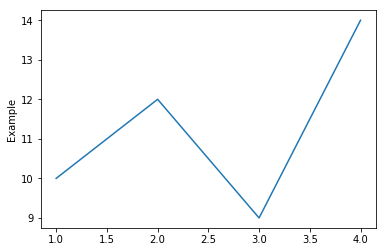

In [2]:
x_values = [1, 2, 3, 4]
y_values = [10, 12, 9, 14]

plt.plot(x_values, y_values)
plt.ylabel('Example')
plt.show()

## Reusing chart formatting

If you will plot several charts of the same format but with different data, it is suggested to create a function and reuse it.

In [3]:
def my_line_plot(x_values, y_values):
    # Plot figure of size 20 to 5 inches
    plt.figure(figsize=(20, 5))
    plt.plot(x_values, y_values, "b-") # "b-" means blue line. "r." would mean red dots etc.

Then we generate some signals and reuse the plot function with different data.

In [4]:
import numpy as np 

# A function to generate a signal that is a sinusoid with given frequency and amplitude + some noise
def generate_sinusoidal_signal(sampling_rate, time_window, frequency, amplitude):
    # Generate a sinusoid signal
    n  = time_window * int(sampling_rate)  # Number of samples
    ts = 1.0 / sampling_rate; # sampling step, in seconds
    t = np.arange(0, time_window, ts) # time vector
    y = np.sin(2 * np.pi * frequency * t) * amplitude
    # Add some noise
    noise_stddev = 2
    noise = np.random.normal(0, noise_stddev, n)
    y_noisy = y + noise
    return t, y_noisy
    
time1, signal1 = generate_sinusoidal_signal(100, 2, 0.7, 5)
time2, signal2 = generate_sinusoidal_signal(200, 1, 3.0, 10)
time3, signal3 = generate_sinusoidal_signal(100, 2, 0.2, 50)

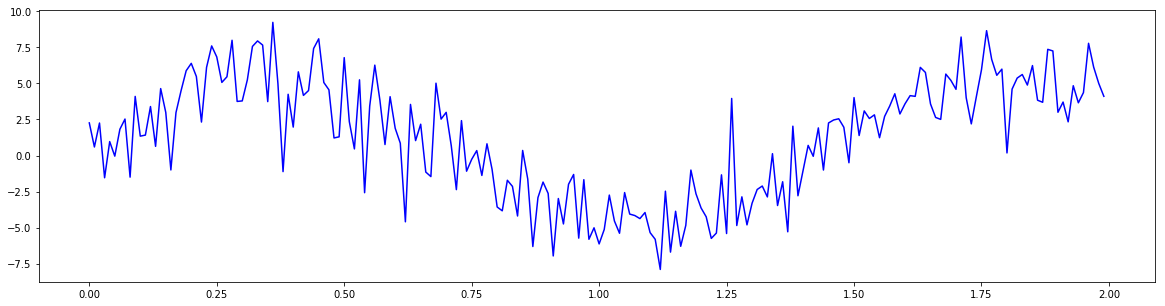

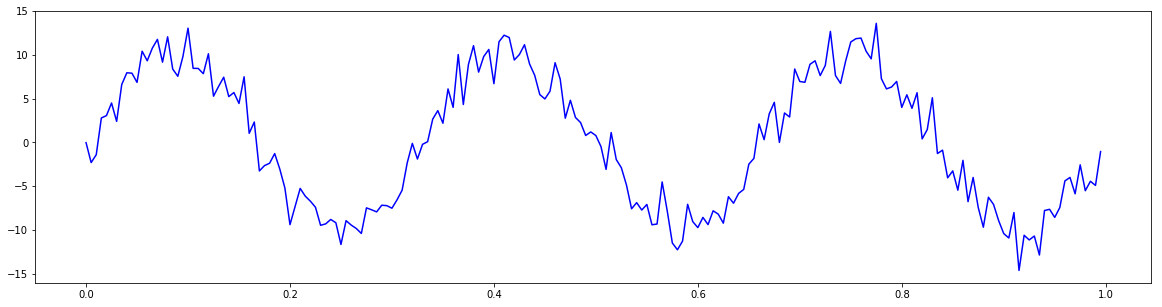

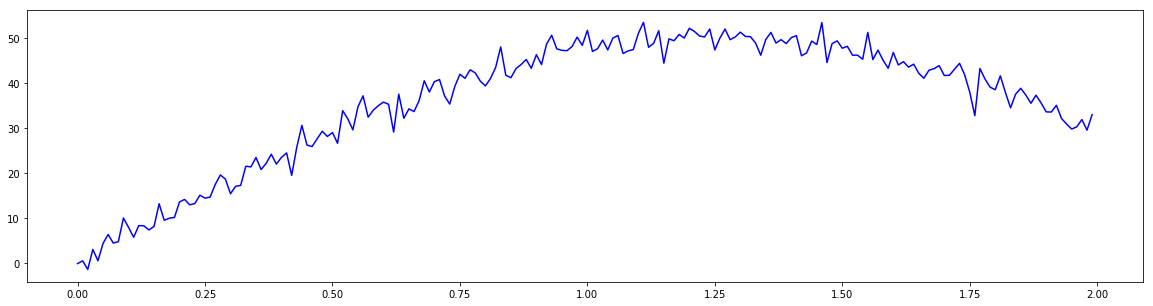

In [5]:
my_line_plot(time1, signal1)
my_line_plot(time2, signal2)
my_line_plot(time3, signal3)

## Plotting Pandas DataFrame data

To plot Pandas DataFrame data you simply pass one column of the DataFrame (a Series object) as x axis and another one as y axis.

In [6]:
import pandas as pd

data = {"City": ["Ålesund", "Molde", "Oslo"], "Population": [47199, 26822, 634293]}
df = pd.DataFrame(data)
df

,City,Population
0,Ålesund,47199
1,Molde,26822
2,Oslo,634293


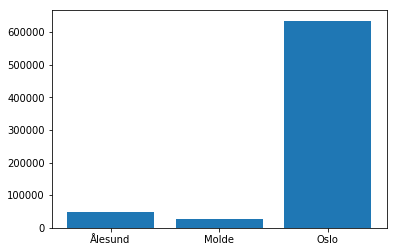

In [7]:
plt.bar(df["City"], df["Population"])
plt.show()

P.S. If you prefer shorter syntax, DataFrame columns can be accessed as attributes directly, without the `[""]`:

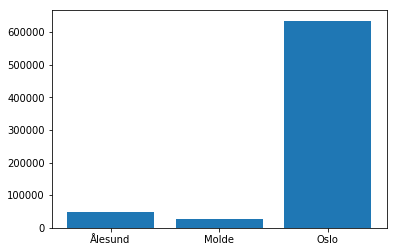

In [8]:
plt.bar(df.City, df.Population)
plt.show()

However, this is a bit risky - in case if the column names are weird:

In [9]:
data2 = {"City name": ["Ålesund", "Molde", "Oslo"], "People count": [47199, 26822, 634293]}
df2 = pd.DataFrame(data2)
df2

,City name,People count
0,Ålesund,47199
1,Molde,26822
2,Oslo,634293


Indexing with `[""]` will still work:

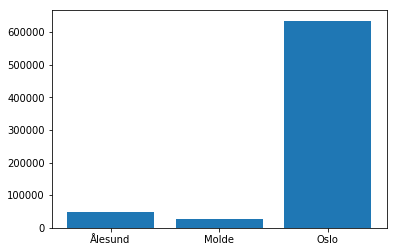

In [10]:
plt.bar(df2["City name"], df2["People count"])
plt.show()